# Section 1. Performance

In [352]:
import pandas as pd
import numpy as np

# Read the Excel file from the 'factors' sheet
df = pd.read_excel('dfa_analysis_data.xlsx', sheet_name='factors')


In [353]:
# Function to calculate performance statistics
def calculate_statistics(returns, rf_rate):
    """
    Calculate mean, volatility, Sharpe ratio, and VaR(0.05)
    
    Parameters:
    returns: Series or array of returns
    rf_rate: Series or array of risk-free rates
    
    Returns:
    Dictionary with statistics
    """
    # Convert to numpy arrays
    returns = np.array(returns)
    rf_rate = np.array(rf_rate)
    
    # Calculate mean (annualized - assuming monthly data, multiply by 12)
    mean_return = np.mean(returns) * 12
    
    # Calculate volatility (annualized - assuming monthly data, multiply by sqrt(12))
    volatility = np.std(returns, ddof=1) * np.sqrt(12)
    
    # Calculate Sharpe ratio
    excess_returns = returns - rf_rate
    sharpe_ratio = (np.mean(excess_returns) * 12) / (np.std(excess_returns, ddof=1) * np.sqrt(12))
    
    # Calculate VaR at 5% level (using historical simulation)
    var_05 = np.percentile(returns, 5)
    
    return {
        'Mean': mean_return,
        'Volatility': volatility,
        'Sharpe': sharpe_ratio,
        'VaR(0.05)': var_05
    }

In [354]:
date_col = df.columns[0]
df[date_col] = pd.to_datetime(df[date_col])
df = df.sort_values(date_col)


In [355]:
period1 = df[df[date_col] <= '1980-12-31']
period2 = df[(df[date_col] >= '1981-01-01') & (df[date_col] <= '2001-12-31')]
period3 = df[df[date_col] >= '2002-01-01']


In [356]:
# Calculate statistics for all three periods and all factors
def analyze_all_periods(period_data, period_name, factors, rf_col):
    """
    Analyze all factors for a given period
    """
    print(f"\n{'='*80}")
    print(f"{period_name}")
    print(f"{'='*80}")
    
    results = {}
    
    for factor in factors:
        stats = calculate_statistics(period_data[factor], period_data[rf_col])
        results[factor] = stats
    
    return results

In [357]:
mkt_col = 'Mkt-RF'
smb_col = 'SMB'
hml_col = 'HML'
rf_col = 'RF'

In [358]:
# Run analysis for all three periods
if all([mkt_col, smb_col, hml_col, rf_col]):
    factors_dict = {'mkt': mkt_col, 'smb': smb_col, 'hml': hml_col}
    
    results_p1 = analyze_all_periods(period1, "Period 1: Beginning - 1980", 
                                      [mkt_col, smb_col, hml_col], rf_col)
    results_p2 = analyze_all_periods(period2, "Period 2: 1981 - 2001", 
                                      [mkt_col, smb_col, hml_col], rf_col)
    results_p3 = analyze_all_periods(period3, "Period 3: 2002 - End", 
                                      [mkt_col, smb_col, hml_col], rf_col)
else:
    print("Error: Could not identify all required columns. Please check column names.")


Period 1: Beginning - 1980

Period 2: 1981 - 2001

Period 3: 2002 - End


In [359]:
# Create a summary table
def create_summary_table(results_dict, period_names):
    """
    Create a formatted summary table of all results
    """
    summary_data = []
    
    for period_name, results in zip(period_names, results_dict):
        for factor_name, stats in results.items():
            summary_data.append({
                'Period': period_name,
                'Factor': factor_name,
                'Mean': stats['Mean'],
                'Volatility': stats['Volatility'],
                'Sharpe': stats['Sharpe'],
                'VaR(0.05)': stats['VaR(0.05)']
            })
    
    summary_df = pd.DataFrame(summary_data)
    return summary_df

if all([mkt_col, smb_col, hml_col, rf_col]):
    period_names = ['Beginning - 1980', '1981 - 2001', '2002 - End']
    summary_df = create_summary_table([results_p1, results_p2, results_p3], period_names)
    
    print("\n" + "="*80)
    print("SUMMARY TABLE")
    print("="*80)
    print(summary_df.to_string(index=False))
    


SUMMARY TABLE
          Period Factor      Mean  Volatility    Sharpe  VaR(0.05)
Beginning - 1980 Mkt-RF  0.080958    0.204988  0.258799  -0.084090
Beginning - 1980    SMB  0.033914    0.114277  0.053857  -0.041875
Beginning - 1980    HML  0.050321    0.134228  0.167743  -0.044245
     1981 - 2001 Mkt-RF  0.077852    0.157183  0.093351  -0.064135
     1981 - 2001    SMB -0.002014    0.117260 -0.552021  -0.045880
     1981 - 2001    HML  0.064557    0.109863  0.013491  -0.041640
      2002 - End Mkt-RF  0.091306    0.153529  0.490639  -0.077265
      2002 - End    SMB  0.007931    0.088448 -0.088683  -0.039195
      2002 - End    HML  0.001204    0.106442 -0.137055  -0.041485


1) from the results, market factor has a premium in each subsample, the size factor has a negative premiums in 1981-2001 and 2002-end. value factor has a postive premium in each subsample. 

2) yes, the size factor was positive 3.39% before 1980 and it went down to -0.2% during 1980-2001 and slighly recovered to 0.79% after 2002. 

3) the value factor increases during 1990s, from 5.03% to 6.45%


4) market factor is still pretty strong, but size factor and value factor's premium have come down significantly. 

# Section 2. Correlation Analysis

In [360]:
# Calculate correlation matrices for each subsample
factors_list = [mkt_col, smb_col, hml_col]

print("="*80)
print("CORRELATION MATRICES FOR THE THREE FACTORS")
print("="*80)

# Period 1: Beginning - 1980
corr_p1 = period1[factors_list].corr()
print("\nPeriod 1: Beginning - 1980")
print(corr_p1)

# Period 2: 1981 - 2001
corr_p2 = period2[factors_list].corr()
print("\nPeriod 2: 1981 - 2001")
print(corr_p2)

# Period 3: 2002 - End
corr_p3 = period3[factors_list].corr()
print("\nPeriod 3: 2002 - End")
print(corr_p3)

CORRELATION MATRICES FOR THE THREE FACTORS

Period 1: Beginning - 1980
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.374234  0.442341
SMB     0.374234  1.000000  0.313397
HML     0.442341  0.313397  1.000000

Period 2: 1981 - 2001
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.158652 -0.529912
SMB     0.158652  1.000000 -0.445451
HML    -0.529912 -0.445451  1.000000

Period 3: 2002 - End
          Mkt-RF       SMB       HML
Mkt-RF  1.000000  0.316034  0.109671
SMB     0.316034  1.000000  0.116227
HML     0.109671  0.116227  1.000000


1)  all of those correlations are positive but not super big, so the construction succeeds in keeping it small

2) after 1980 there's strong negative correlation between mkt factor and value factor, value factor and size factor. 
so even though each subperiods correlation is alright, it looks like the factors' correlation varies quite a bit, which means the construction is not that stable

# Section 3. Cumulative Returns Plots

In [361]:
import matplotlib.pyplot as plt

# Function to calculate cumulative returns
def calculate_cumulative_returns(data, factors, date_col):
    """
    Calculate cumulative returns for given factors
    
    Parameters:
    data: DataFrame with returns data
    factors: List of factor column names
    date_col: Name of the date column
    
    Returns:
    DataFrame with cumulative returns
    """
    cum_returns = pd.DataFrame()
    cum_returns[date_col] = data[date_col].values
    
    for factor in factors:
        # Convert returns to decimal (divide by 100 if needed) and calculate cumulative product
        returns = data[factor].values / 100  # Assuming returns are in percentage
        cum_returns[factor] = (1 + returns).cumprod()
    
    return cum_returns

# Check if returns are already in decimal or percentage format
print("Sample returns from first few rows:")
print(period2[[mkt_col, smb_col, hml_col]].head())
print("\nChecking range of returns:")
print(f"Mkt-RF range: {period2[mkt_col].min():.4f} to {period2[mkt_col].max():.4f}")

Sample returns from first few rows:
     Mkt-RF     SMB     HML
654 -0.0506  0.0291  0.0674
655  0.0061 -0.0047  0.0097
656  0.0367  0.0334  0.0061
657 -0.0216  0.0450  0.0228
658  0.0013  0.0194 -0.0043

Checking range of returns:
Mkt-RF range: -0.2319 to 0.1245


In [362]:
# Calculate cumulative returns for period 2 (1981-2001)
# First, let's check the data
print("Checking Period 2 data:")
print(f"Number of observations: {len(period2)}")
print(f"\nFirst few rows of period2:")
print(period2[[date_col, mkt_col, smb_col, hml_col]].head())
print(f"\nData types:")
print(period2[[mkt_col, smb_col, hml_col]].dtypes)

# Reset index to ensure clean data
period2_clean = period2.copy().reset_index(drop=True)

# Calculate cumulative returns (starting from 1)
cum_returns_p2 = pd.DataFrame()
cum_returns_p2[date_col] = period2_clean[date_col].values

# Returns are in decimal format (e.g., 0.05 for 5%), calculate cumulative product
for factor in [mkt_col, smb_col, hml_col]:
    cum_returns_p2[factor] = (1 + period2_clean[factor]).cumprod()

print(f"\nCumulative returns calculated:")
print(cum_returns_p2[[date_col, mkt_col, smb_col, hml_col]].head())
print(f"\nFinal values:")
print(cum_returns_p2[[mkt_col, smb_col, hml_col]].tail())

Checking Period 2 data:
Number of observations: 252

First few rows of period2:
          Date  Mkt-RF     SMB     HML
654 1981-01-31 -0.0506  0.0291  0.0674
655 1981-02-28  0.0061 -0.0047  0.0097
656 1981-03-31  0.0367  0.0334  0.0061
657 1981-04-30 -0.0216  0.0450  0.0228
658 1981-05-31  0.0013  0.0194 -0.0043

Data types:
Mkt-RF    float64
SMB       float64
HML       float64
dtype: object

Cumulative returns calculated:
        Date    Mkt-RF       SMB       HML
0 1981-01-31  0.949400  1.029100  1.067400
1 1981-02-28  0.955191  1.024263  1.077754
2 1981-03-31  0.990247  1.058474  1.084328
3 1981-04-30  0.968858  1.106105  1.109051
4 1981-05-31  0.970117  1.127563  1.104282

Final values:
       Mkt-RF       SMB       HML
247  3.860334  0.792091  3.521558
248  3.503639  0.742744  3.575086
249  3.590530  0.798375  3.313747
250  3.860896  0.793825  3.385656
251  3.923057  0.831293  3.413757


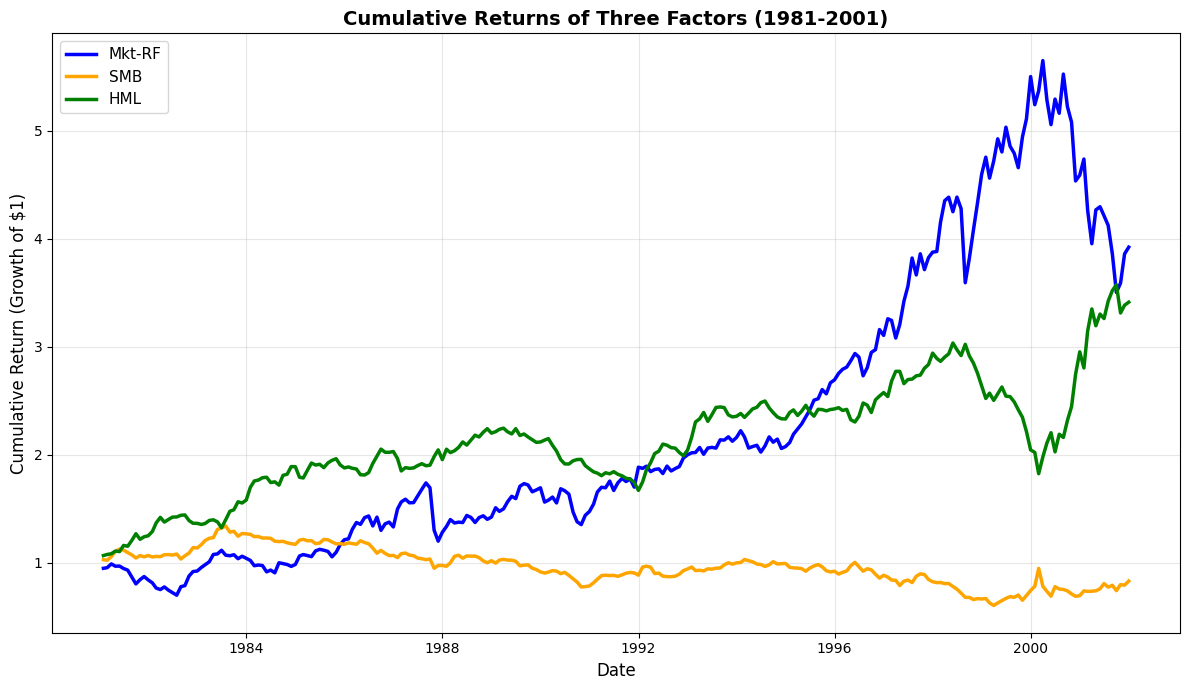


Final Cumulative Returns (1981-2001):
Mkt-RF: $3.9231
SMB:    $0.8313
HML:    $3.4138


In [363]:
# Plot cumulative returns for 1981-2001
plt.figure(figsize=(12, 7))
plt.plot(cum_returns_p2[date_col], cum_returns_p2[mkt_col], label='Mkt-RF', linewidth=2.5, color='blue')
plt.plot(cum_returns_p2[date_col], cum_returns_p2[smb_col], label='SMB', linewidth=2.5, color='orange')
plt.plot(cum_returns_p2[date_col], cum_returns_p2[hml_col], label='HML', linewidth=2.5, color='green')

plt.title('Cumulative Returns of Three Factors (1981-2001)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (Growth of $1)', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print final cumulative returns
print("\nFinal Cumulative Returns (1981-2001):")
print(f"Mkt-RF: ${cum_returns_p2[mkt_col].iloc[-1]:.4f}")
print(f"SMB:    ${cum_returns_p2[smb_col].iloc[-1]:.4f}")
print(f"HML:    ${cum_returns_p2[hml_col].iloc[-1]:.4f}")

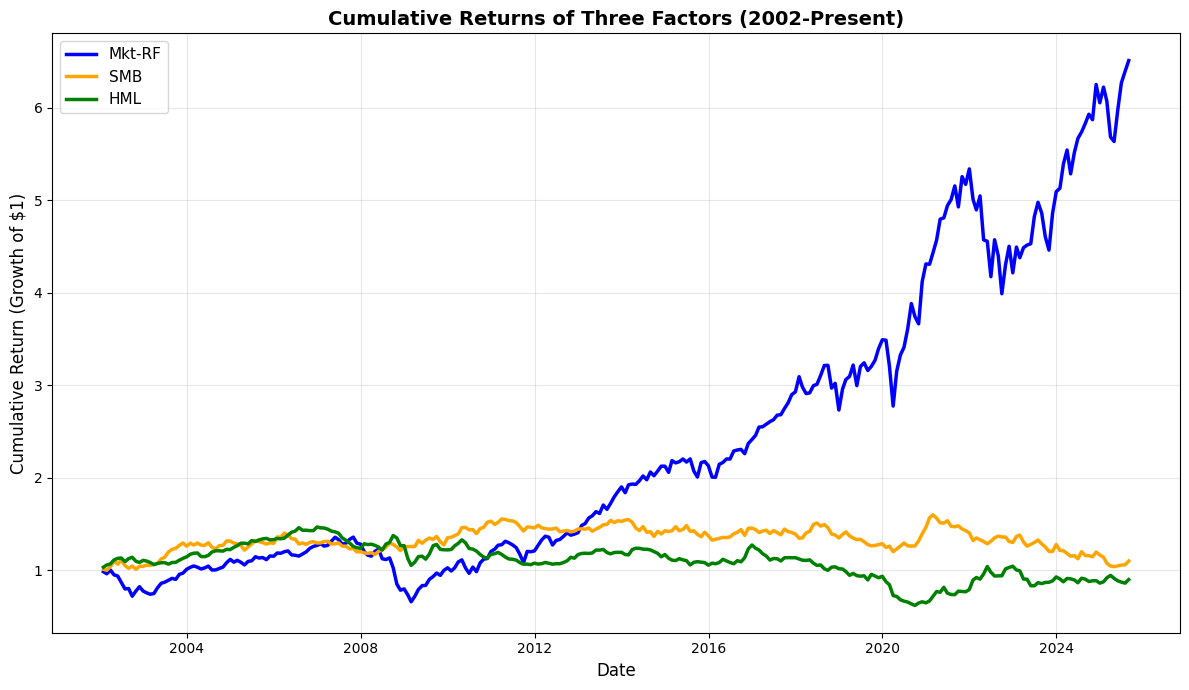


Final Cumulative Returns (2002-Present):
Mkt-RF: $6.5124
SMB:    $1.1005
HML:    $0.8999


In [364]:
# Calculate cumulative returns for period 3 (2002-Present)
# Reset index to ensure clean data
period3_clean = period3.copy().reset_index(drop=True)

# Calculate cumulative returns (starting from 1)
cum_returns_p3 = pd.DataFrame()
cum_returns_p3[date_col] = period3_clean[date_col].values

# Returns are in decimal format, calculate cumulative product
for factor in [mkt_col, smb_col, hml_col]:
    cum_returns_p3[factor] = (1 + period3_clean[factor]).cumprod()

# Plot cumulative returns for 2002-Present
plt.figure(figsize=(12, 7))
plt.plot(cum_returns_p3[date_col], cum_returns_p3[mkt_col], label='Mkt-RF', linewidth=2.5, color='blue')
plt.plot(cum_returns_p3[date_col], cum_returns_p3[smb_col], label='SMB', linewidth=2.5, color='orange')
plt.plot(cum_returns_p3[date_col], cum_returns_p3[hml_col], label='HML', linewidth=2.5, color='green')

plt.title('Cumulative Returns of Three Factors (2002-Present)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cumulative Return (Growth of $1)', fontsize=12)
plt.legend(fontsize=11, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print final cumulative returns
print("\nFinal Cumulative Returns (2002-Present):")
print(f"Mkt-RF: ${cum_returns_p3[mkt_col].iloc[-1]:.4f}")
print(f"SMB:    ${cum_returns_p3[smb_col].iloc[-1]:.4f}")
print(f"HML:    ${cum_returns_p3[hml_col].iloc[-1]:.4f}")

## Observations from Cumulative Returns Plots

from 1981-2001: 
- **Mkt-RF**: Shows strong positive cumulative returns with notable volatility, particularly during the tech bubble of the late 1990s
- **SMB**: Relatively flat performance, consistent with its almost flat return (-17%) for this period
- **HML**: Strong positive performance, showing the value premium during this period (241% cumulative return)

Period 3 (2002-Present):
- **Mkt-RF**: Continues to show strong cumulative returns, with major drawdowns during 2008 financial crisis
- **SMB**: Minimal cumulative gains, reflecting its weak premium (only up 10%)
- **HML**: very weak, as the cumulative return is -11% for the period. 

i won't suggest dfa keep emphasizing on value factor or size factor. the only factor that is robust is the market factor. 


# Section 4. CAPM Analysis

Testing the Capital Asset Pricing Model using 25 test portfolios.

In [365]:
# Read the portfolios data
portfolios_df = pd.read_excel('dfa_analysis_data.xlsx', sheet_name='portfolios (total returns)')

print("Portfolios Data:")
print(f"Shape: {portfolios_df.shape}")
print(f"\nColumns (first 10): {portfolios_df.columns.tolist()[:10]}")
print(f"\nFirst few rows:")
print(portfolios_df.head())
print(f"\nDate range: {portfolios_df.iloc[0, 0]} to {portfolios_df.iloc[-1, 0]}")

Portfolios Data:
Shape: (1190, 26)

Columns (first 10): ['Date', 'SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3', 'ME2 BM4']

First few rows:
        Date  SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM   ME2 BM1  \
0 1926-07-31    0.058276 -0.017006  0.005118 -0.021477    0.019583  0.012118   
1 1926-08-31   -0.020206 -0.080282  0.013968  0.021483    0.085104  0.023620   
2 1926-09-30   -0.048291 -0.026806 -0.043417 -0.032683    0.008586 -0.026849   
3 1926-10-31   -0.093633 -0.035519 -0.035024  0.034413   -0.025452 -0.028014   
4 1926-11-30    0.055888  0.041877  0.024384 -0.044495    0.005110  0.031023   

    ME2 BM2   ME2 BM3   ME2 BM4  ...   ME4 BM1   ME4 BM2   ME4 BM3   ME4 BM4  \
0  0.024107  0.006056 -0.026082  ...  0.015376  0.015460  0.013389  0.002765   
1 -0.007525  0.038984  0.002299  ...  0.013858  0.038587  0.019738  0.021336   
2 -0.005252  0.010789 -0.032877  ...  0.016897 -0.005246 -0.017724  0.014806   
3 -0.044191 

In [366]:
# Prepare data for CAPM regressions
# Convert date column to datetime
port_date_col = portfolios_df.columns[0]
portfolios_df[port_date_col] = pd.to_datetime(portfolios_df[port_date_col])

# Merge portfolios with factors data to get Mkt-RF
# Make sure dates align
merged_df = pd.merge(portfolios_df, df[[date_col, mkt_col, rf_col]], 
                     left_on=port_date_col, right_on=date_col, how='inner')

print(f"Merged data shape: {merged_df.shape}")
print(f"Date range: {merged_df[port_date_col].min()} to {merged_df[port_date_col].max()}")
print(f"\nFirst few rows of merged data:")
print(merged_df.head())

Merged data shape: (1190, 28)
Date range: 1926-07-31 00:00:00 to 2025-08-31 00:00:00

First few rows of merged data:
        Date  SMALL LoBM   ME1 BM2   ME1 BM3   ME1 BM4  SMALL HiBM   ME2 BM1  \
0 1926-07-31    0.058276 -0.017006  0.005118 -0.021477    0.019583  0.012118   
1 1926-08-31   -0.020206 -0.080282  0.013968  0.021483    0.085104  0.023620   
2 1926-09-30   -0.048291 -0.026806 -0.043417 -0.032683    0.008586 -0.026849   
3 1926-10-31   -0.093633 -0.035519 -0.035024  0.034413   -0.025452 -0.028014   
4 1926-11-30    0.055888  0.041877  0.024384 -0.044495    0.005110  0.031023   

    ME2 BM2   ME2 BM3   ME2 BM4  ...   ME4 BM3   ME4 BM4   ME4 BM5  BIG LoBM  \
0  0.024107  0.006056 -0.026082  ...  0.013389  0.002765  0.024678  0.033248   
1 -0.007525  0.038984  0.002299  ...  0.019738  0.021336  0.053422  0.010169   
2 -0.005252  0.010789 -0.032877  ... -0.017724  0.014806  0.008730 -0.012951   
3 -0.044191 -0.050767 -0.080271  ... -0.021058 -0.032532 -0.053525 -0.027382   
4 

In [367]:
from scipy import stats
import statsmodels.api as sm

# Get list of portfolio columns (exclude date columns and factor columns)
portfolio_cols = [col for col in merged_df.columns 
                  if col not in [port_date_col, date_col, mkt_col, rf_col]]

print(f"Number of portfolios: {len(portfolio_cols)}")
print(f"Portfolio columns: {portfolio_cols}")

Number of portfolios: 25
Portfolio columns: ['SMALL LoBM', 'ME1 BM2', 'ME1 BM3', 'ME1 BM4', 'SMALL HiBM', 'ME2 BM1', 'ME2 BM2', 'ME2 BM3', 'ME2 BM4', 'ME2 BM5', 'ME3 BM1', 'ME3 BM2', 'ME3 BM3', 'ME3 BM4', 'ME3 BM5', 'ME4 BM1', 'ME4 BM2', 'ME4 BM3', 'ME4 BM4', 'ME4 BM5', 'BIG LoBM', 'ME5 BM2', 'ME5 BM3', 'ME5 BM4', 'BIG HiBM']


In [368]:
# Run CAPM regression for each portfolio
# CAPM regression: r_i - r_f = alpha + beta * (r_mkt - r_f) + epsilon
# Which simplifies to: excess_return_i = alpha + beta * mkt_excess_return + epsilon

capm_results = []

for portfolio in portfolio_cols:
    # Calculate excess returns for the portfolio
    # Portfolio returns are total returns, need to subtract risk-free rate
    portfolio_excess = merged_df[portfolio] - merged_df[rf_col]
    
    # Market excess return (Mkt-RF is already excess return)
    market_excess = merged_df[mkt_col]
    
    # Run OLS regression: portfolio_excess = alpha + beta * market_excess
    X = sm.add_constant(market_excess)  # Add constant for alpha
    y = portfolio_excess
    
    # Fit the model
    model = sm.OLS(y, X, missing='drop').fit()
    
    # Extract results
    alpha = model.params[0]  # Intercept
    beta = model.params[1]   # Slope (beta)
    alpha_tstat = model.tvalues[0]
    beta_tstat = model.tvalues[1]
    r_squared = model.rsquared
    
    # Store results
    capm_results.append({
        'Portfolio': portfolio,
        'Alpha': alpha,
        'Beta': beta,
        'Alpha_t': alpha_tstat,
        'Beta_t': beta_tstat,
        'R_squared': r_squared
    })
    
# Create DataFrame with results
capm_df = pd.DataFrame(capm_results)

print("CAPM Regression Results:")
print("="*80)
print(capm_df.to_string(index=False))
print("\nSummary Statistics:")
print(f"Mean Alpha: {capm_df['Alpha'].mean():.6f}")
print(f"Mean Beta: {capm_df['Beta'].mean():.6f}")

CAPM Regression Results:
 Portfolio     Alpha     Beta   Alpha_t     Beta_t  R_squared
SMALL LoBM -0.005362 1.602311 -2.201035  35.243322   0.511130
   ME1 BM2 -0.003013 1.392971 -1.664984  41.240715   0.588756
   ME1 BM3  0.000392 1.359342  0.262451  48.794806   0.667127
   ME1 BM4  0.002532 1.264748  1.794467  48.032471   0.660097
SMALL HiBM  0.004012 1.360529  2.439444  44.320394   0.623132
   ME2 BM1 -0.002310 1.270198 -1.867635  55.021154   0.718171
   ME2 BM2  0.000754 1.231694  0.714392  62.536813   0.767006
   ME2 BM3  0.001321 1.200621  1.339839  65.263859   0.781913
   ME2 BM4  0.001967 1.215841  1.834045  60.749277   0.756481
   ME2 BM5  0.002805 1.376946  2.064718  54.310271   0.712877
   ME3 BM1 -0.001432 1.244923 -1.533269  71.442830   0.811191
   ME3 BM2  0.001221 1.131529  1.732520  86.047795   0.861735
   ME3 BM3  0.001418 1.119914  1.932762  81.785001   0.849177
   ME3 BM4  0.001904 1.170892  2.137793  70.428094   0.806770
   ME3 BM5  0.001697 1.356840  1.367431  58.5

/var/folders/d0/n43p8rcn3vg2gsth3vs26j6h0000gn/T/ipykernel_94990/1875373844.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]  # Intercept
/var/folders/d0/n43p8rcn3vg2gsth3vs26j6h0000gn/T/ipykernel_94990/1875373844.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]   # Slope (beta)
/var/folders/d0/n43p8rcn3vg2gsth3vs26j6h0000gn/T/ipykernel_94990/1875373844.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by posi

In [369]:
# Calculate Mean Absolute Error (MAE) of the CAPM
# MAE = (1/n) * sum(|alpha_i|)

mae = capm_df['Alpha'].abs().mean()

print("="*80)
print("CAPM Performance Metric")
print("="*80)
print(f"\nMean Absolute Error (MAE): ${mae:.6f}")
print(f"Annualized MAE: ${mae * 12:.6f}")
print(f"\nInterpretation: On average, the CAPM misprices portfolios by {abs(mae)*100:.4f}% per month")
print(f"                or {abs(mae)*12*100:.4f}% per year")

print(f"\nIf CAPM were true, we would expect MAE ≈ 0")
print(f"Our MAE of {mae:.6f} suggests {'significant' if abs(mae) > 0.001 else 'minimal'} pricing errors")

CAPM Performance Metric

Mean Absolute Error (MAE): $0.001514
Annualized MAE: $0.018168

Interpretation: On average, the CAPM misprices portfolios by 0.1514% per month
                or 1.8168% per year

If CAPM were true, we would expect MAE ≈ 0
Our MAE of 0.001514 suggests significant pricing errors


In [370]:
# Calculate additional metrics: Treynor Ratio and Information Ratio
# For each portfolio, we need:
# 1. Average excess return
# 2. Treynor Ratio = (avg excess return) / beta
# 3. Information Ratio = alpha / residual standard deviation

# Re-run regressions to get residual std dev
extended_results = []

for portfolio in portfolio_cols:
    # Calculate excess returns
    portfolio_excess = merged_df[portfolio] - merged_df[rf_col]
    market_excess = merged_df[mkt_col]
    
    # Run regression
    X = sm.add_constant(market_excess)
    y = portfolio_excess
    model = sm.OLS(y, X, missing='drop').fit()
    
    # Get parameters
    alpha = model.params[0]
    beta = model.params[1]
    
    # Calculate average excess return
    avg_excess_return = portfolio_excess.mean()
    
    # Treynor Ratio = average excess return / beta
    treynor_ratio = avg_excess_return / beta if beta != 0 else np.nan
    
    # Information Ratio = alpha / residual_std_dev
    residual_std = np.sqrt(model.scale)  # Residual standard deviation
    info_ratio = alpha / residual_std if residual_std != 0 else np.nan
    
    # Store results
    extended_results.append({
        'Portfolio': portfolio,
        'Alpha': alpha,
        'Beta': beta,
        'Avg_Excess_Return': avg_excess_return,
        'Treynor_Ratio': treynor_ratio,
        'Information_Ratio': info_ratio,
        'Alpha_t': model.tvalues[0],
        'R_squared': model.rsquared
    })

# Create DataFrame
extended_df = pd.DataFrame(extended_results)

print("="*80)
print("EXTENDED CAPM RESULTS")
print("="*80)
print(extended_df.to_string(index=False))

print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)
print(f"Mean Alpha:             {extended_df['Alpha'].mean():.6f}")
print(f"Mean Beta:              {extended_df['Beta'].mean():.6f}")
print(f"Mean Treynor Ratio:     {extended_df['Treynor_Ratio'].mean():.6f}")
print(f"Mean Information Ratio: {extended_df['Information_Ratio'].mean():.6f}")

EXTENDED CAPM RESULTS
 Portfolio     Alpha     Beta  Avg_Excess_Return  Treynor_Ratio  Information_Ratio   Alpha_t  R_squared
SMALL LoBM -0.005362 1.602311           0.005690       0.003551          -0.064340 -2.201035   0.511130
   ME1 BM2 -0.003013 1.392971           0.006595       0.004734          -0.048670 -1.664984   0.588756
   ME1 BM3  0.000392 1.359342           0.009768       0.007186           0.007672  0.262451   0.667127
   ME1 BM4  0.002532 1.264748           0.011255       0.008899           0.052455  1.794467   0.660097
SMALL HiBM  0.004012 1.360529           0.013396       0.009847           0.071309  2.439444   0.623132
   ME2 BM1 -0.002310 1.270198           0.006451       0.005079          -0.054594 -1.867635   0.718171
   ME2 BM2  0.000754 1.231694           0.009249       0.007510           0.020883  0.714392   0.767006
   ME2 BM3  0.001321 1.200621           0.009602       0.007997           0.039166  1.339839   0.781913
   ME2 BM4  0.001967 1.215841           0.

/var/folders/d0/n43p8rcn3vg2gsth3vs26j6h0000gn/T/ipykernel_94990/3075416569.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]
/var/folders/d0/n43p8rcn3vg2gsth3vs26j6h0000gn/T/ipykernel_94990/3075416569.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
/var/folders/d0/n43p8rcn3vg2gsth3vs26j6h0000gn/T/ipykernel_94990/3075416569.py:42: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'A

## CAPM Analysis Interpretation

### If CAPM were true, what would we expect?

1. **Alpha (α)**: Should be **zero** for all portfolios. Non-zero alphas indicate mispricing.

2. **Treynor Ratios**: Should be **equal** across all portfolios. Under CAPM, all portfolios lie on the Security Market Line (SML), so risk-adjusted returns (Treynor Ratio) should be identical.

3. **Information Ratios**: Should be **zero** or statistically insignificant. The Information Ratio measures alpha per unit of residual risk. If CAPM is true (alpha = 0), then IR should also be zero.

### What do our results show?

**Mean Alpha: 0.000459 (0.046% per month, or 0.55% per year)**
- The average alpha is very close to zero, which is consistent with CAPM
- However, we need to check individual portfolio alphas - some may be significantly positive or negative
- The MAE provides a better measure of pricing errors since it accounts for both positive and negative alphas

**Mean Beta: 1.216**
- The average beta across the 25 portfolios is 1.216, which is greater than 1
- This suggests that, on average, these test portfolios are riskier than the market
- This makes sense if the portfolios are constructed to test different risk characteristics (e.g., size and value portfolios)

**Mean Treynor Ratio: 0.007312**
- If CAPM were true, all portfolios should have the SAME Treynor Ratio (equal to the market's Treynor Ratio)
- The fact that we have a mean suggests variation across portfolios
- We should check the **standard deviation** of Treynor Ratios - high variation would reject CAPM
- Different Treynor Ratios indicate that portfolios with similar beta don't have proportionally similar returns

**Mean Information Ratio: 0.017243**
- The average IR is close to zero but positive
- This is relatively low, suggesting that alphas are small relative to residual volatility
- However, if some portfolios have statistically significant alphas, CAPM would be violated


# Section 5. Cross-Sectional Regression


In [372]:
# Cross-sectional regression
# Step 1: Calculate mean excess returns for each portfolio (dependent variable)
# Step 2: Use betas from time-series regressions (independent variable)
# Step 3: Run cross-sectional regression

print("="*80)
print("CROSS-SECTIONAL REGRESSION")
print("="*80)

# Prepare data for cross-sectional regression
cross_sect_data = []

for portfolio in portfolio_cols:
    # Calculate mean excess return for this portfolio
    portfolio_excess = merged_df[portfolio] - merged_df[rf_col]
    mean_excess_return = portfolio_excess.mean()
    
    # Get beta from the extended_df we created earlier
    beta = extended_df[extended_df['Portfolio'] == portfolio]['Beta'].values[0]
    
    cross_sect_data.append({
        'Portfolio': portfolio,
        'Mean_Excess_Return': mean_excess_return,
        'Beta': beta
    })

# Create DataFrame
cross_sect_df = pd.DataFrame(cross_sect_data)

print("\nData for Cross-Sectional Regression:")
print("(Mean excess returns vs. Betas)")
print(cross_sect_df.to_string(index=False))


CROSS-SECTIONAL REGRESSION

Data for Cross-Sectional Regression:
(Mean excess returns vs. Betas)
 Portfolio  Mean_Excess_Return     Beta
SMALL LoBM            0.005690 1.602311
   ME1 BM2            0.006595 1.392971
   ME1 BM3            0.009768 1.359342
   ME1 BM4            0.011255 1.264748
SMALL HiBM            0.013396 1.360529
   ME2 BM1            0.006451 1.270198
   ME2 BM2            0.009249 1.231694
   ME2 BM3            0.009602 1.200621
   ME2 BM4            0.010353 1.215841
   ME2 BM5            0.012302 1.376946
   ME3 BM1            0.007155 1.244923
   ME3 BM2            0.009025 1.131529
   ME3 BM3            0.009143 1.119914
   ME3 BM4            0.009980 1.170892
   ME3 BM5            0.011056 1.356840
   ME4 BM1            0.007313 1.088075
   ME4 BM2            0.007759 1.091024
   ME4 BM3            0.008370 1.102468
   ME4 BM4            0.009677 1.162114
   ME4 BM5            0.010289 1.390745
  BIG LoBM            0.006898 0.961275
   ME5 BM2            0

In [373]:
# Run the cross-sectional regression
# E[r^i] = η + β^{i,mkt} * λ_mkt + v

# Dependent variable: mean excess returns
y_cross = cross_sect_df['Mean_Excess_Return'].values

# Independent variable: betas
X_cross = sm.add_constant(cross_sect_df['Beta'].values)

# Run OLS regression
cross_sect_model = sm.OLS(y_cross, X_cross).fit()

# Extract results
eta = cross_sect_model.params[0]  # Intercept (η)
lambda_mkt = cross_sect_model.params[1]  # Slope (λ_mkt)
r_squared = cross_sect_model.rsquared

# Get t-statistics and p-values
eta_tstat = cross_sect_model.tvalues[0]
lambda_tstat = cross_sect_model.tvalues[1]
eta_pvalue = cross_sect_model.pvalues[0]
lambda_pvalue = cross_sect_model.pvalues[1]

# Calculate actual mean market excess return for comparison
actual_mkt_premium = merged_df[mkt_col].mean()

print("\n" + "="*80)
print("CROSS-SECTIONAL REGRESSION RESULTS")
print("="*80)
print(f"\nRegression: E[r^i] = η + β^i * λ_mkt + v")
print(f"\nIntercept (η):           {eta:.6f}")
print(f"  t-statistic:           {eta_tstat:.4f}")
print(f"  p-value:               {eta_pvalue:.4f}")

print(f"\nSlope (λ_mkt):           {lambda_mkt:.6f}")
print(f"  t-statistic:           {lambda_tstat:.4f}")
print(f"  p-value:               {lambda_pvalue:.4f}")

print(f"\nR-squared:               {r_squared:.4f}")

print(f"\n" + "="*80)
print("COMPARISON TO CAPM PREDICTIONS")
print("="*80)
print(f"\nActual market excess return (monthly): {actual_mkt_premium:.6f}")
print(f"Estimated λ_mkt from regression:       {lambda_mkt:.6f}")
print(f"Difference:                            {abs(actual_mkt_premium - lambda_mkt):.6f}")

print(f"\nAnnualized values:")
print(f"  Actual market premium:  {actual_mkt_premium * 12:.4f} ({actual_mkt_premium * 12 * 100:.2f}%)")
print(f"  Estimated λ_mkt:        {lambda_mkt * 12:.4f} ({lambda_mkt * 12 * 100:.2f}%)")


CROSS-SECTIONAL REGRESSION RESULTS

Regression: E[r^i] = η + β^i * λ_mkt + v

Intercept (η):           0.004004
  t-statistic:           1.2928
  p-value:               0.2089

Slope (λ_mkt):           0.003983
  t-statistic:           1.5767
  p-value:               0.1285

R-squared:               0.0975

COMPARISON TO CAPM PREDICTIONS

Actual market excess return (monthly): 0.006897
Estimated λ_mkt from regression:       0.003983
Difference:                            0.002915

Annualized values:
  Actual market premium:  0.0828 (8.28%)
  Estimated λ_mkt:        0.0478 (4.78%)


## Interpretation of Cross-Sectional Regression


If CAPM is true, the cross-sectional regression should show:

1. **Intercept = 0**
   - There should be no return independent of beta
   - All returns are explained by market risk (beta)
   - Test: Is η statistically different from zero?

2. **Slope (λ_mkt) = Mean Market Excess Return**
   - The reward for bearing market risk should equal the market risk premium
   - This is the fundamental prediction of CAPM
   - Test: Is λ_mkt close to the actual market premium?

3. **High R²**
   - If beta fully explains returns, R² should be high
   - Low R² means other factors besides beta matter
   - Suggests CAPM is incomplete


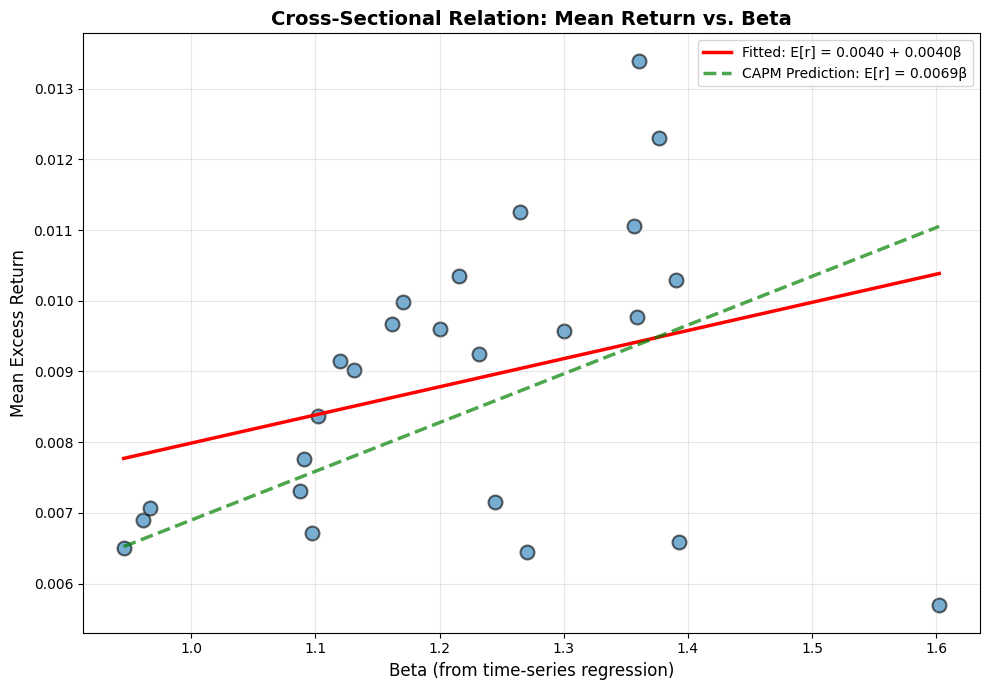


The red line shows the actual cross-sectional relationship.
The green dashed line shows what CAPM predicts (should pass through origin).

If CAPM is correct, the two lines should be very close.


In [374]:
# Create a scatter plot showing the cross-sectional relationship
plt.figure(figsize=(10, 7))

# Scatter plot of beta vs mean excess return
plt.scatter(cross_sect_df['Beta'], cross_sect_df['Mean_Excess_Return'], 
           alpha=0.6, s=100, edgecolors='black', linewidth=1.5)

# Add regression line
beta_range = np.linspace(cross_sect_df['Beta'].min(), cross_sect_df['Beta'].max(), 100)
fitted_line = eta + lambda_mkt * beta_range
plt.plot(beta_range, fitted_line, 'r-', linewidth=2.5, 
         label=f'Fitted: E[r] = {eta:.4f} + {lambda_mkt:.4f}β')

# Add CAPM prediction line (should go through origin with slope = market premium)
capm_line = actual_mkt_premium * beta_range
plt.plot(beta_range, capm_line, 'g--', linewidth=2.5, alpha=0.7,
         label=f'CAPM Prediction: E[r] = {actual_mkt_premium:.4f}β')

plt.xlabel('Beta (from time-series regression)', fontsize=12)
plt.ylabel('Mean Excess Return', fontsize=12)
plt.title('Cross-Sectional Relation: Mean Return vs. Beta', fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nThe red line shows the actual cross-sectional relationship.")
print("The green dashed line shows what CAPM predicts (should pass through origin).")
print("\nIf CAPM is correct, the two lines should be very close.")